# 나이브 베이즈 (naive bayes)
- 나이브 베이즈는 서로 조건부 독립(conditional independence)인 피처를 가정하고, 베이즈 이론을 기반으로 하는 머신러닝 알고리즘이다. 
- 확률 변수 Y가 주어졌을 때, 확률 변수 X1과 X2가 조건부 록립이면 아래 식을 만족한다 
![naive](img/Naive.png)

### 조건부 독립 
확률 변수 A, B가 독립이면 A,B의 결합 확률은 주변 확률의 곱과 같다 

$$P(A,B)=P(A)P(B)$$

조건부독립(conditional independence)은 일반적인 독립과 달리 조건이 되는 별개의 확률변수 C가 존재해야 한다. 조건이 되는 확률변수 C에 대한 A, B의 결합조건부확률이 C에 대한 A, B의 조건부확률의 곱과 같으면 A와 B가 C에 대해 조건부독립이라고 한다.

$$P(A,B|C)=P(A|C)P(B|C)$$

기호로는 다음과 같이 표기한다.

$$A⫫B|C$$

조건부독립과 비교하여 일반적인 독립은 무조건부독립이라고 한다. 무조건부독립은 다음과 같이 표기하도 한다.

A, B가 C에 대해 조건부독립이면 다음도 만족한다.

$$P(A|B,C)=P(A|C)$$
$$P(B|A,C)=P(B|C)$$
주의할 점은 조건부독립과 무조건부독립은 관계가 없다는 점이다. 즉, 두 확률변수가 독립이라고 항상 조건부독립이 되는 것도 아니고 조건부독립이라고 꼭 독립이 되는 것도 아니다.

$$P(A,B)=P(A)P(B)\bcancel⟹P(A,B|C)=P(A|C)P(B|C)$$
$$P(A,B|C)=P(A|C)P(B|C)\bcancel⟹P(A,B)=P(A)P(B)$$

예를 들어 어떤 동물의 어미의 몸무게가 $xkg$일 때 새끼의 몸무게는 x를 기댓값으로 하고 $5kg$ 표준편차를 가지는 정규분포라고 가정하자. 이 동물의 새끼 중 2마리의 몸무게를 각각 A, B라고 하고 어미의 몸무게를 C라고 한다. 시물레이션을 통해 어미 표본과 각각의 어미에 대해 2마리의 새끼 표본을 만들자.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

np.random.seed(0)
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

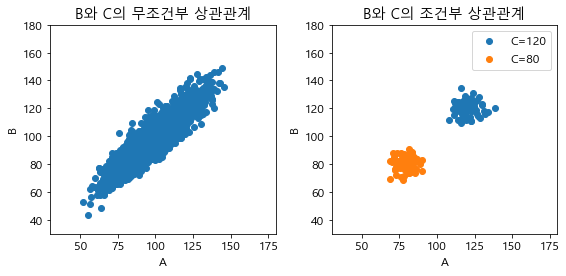

In [28]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(A, B)
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.title("B와 C의 무조건부 상관관계")

plt.subplot(122)
idx1 = (118 < C) & (C < 122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.legend()
plt.title("B와 C의 조건부 상관관계")

plt.tight_layout()
plt.show()

### 나이브 가정¶
독립변수 x가 D차원이라고 가정하자.

$$x=(x_1,…,x_D)$$
가능도함수는 $x_1,…,x_D$의 결합확률이 된다.

$$P(x∣y=k)=P(x_1,…,x_D∣y=k)$$
원리상으로는 $y=k$인 데이터만 모아서 이 가능도함수의 모양을 추정할 수 있다. 하지만 차원 D가 커지면 가능도함수의 추정이 현실적으로 어려워진다.

따라서 나이즈베이즈 분류모형(Naive Bayes classification model)에서는 모든 차원의 개별 독립변수가 서로 조건부독립(conditional independent)이라는 가정을 사용한다. 

이러한 가정을 나이브 가정(naive assumption)이라고 한다.

나이브 가정으로 사용하면 벡터 x의 결합확률분포함수는 개별 스칼라 원소 xd의 확률분포함수의 곱이 된다.

$$P(x1,…,xD∣y=k)=\prod_{d=1}^{D}P(x_d∣y=k)$$
스칼라 원소 xd의 확률분포함수는 결합확률분포함수보다 추정하기 훨씬 쉽다.

가능도함수를 추정한 후에는 베이즈정리를 사용하여 조건부확률을 계산할 수 있다.

$$P(y=k∣x)=\frac{P(x_1,…,x_D∣y=k)P(y=k)}{P(x)}\\\frac{=(∏_{d=1}^{D}P(x_d∣y=k))P(y=k)}{P(x)}$$

### 정규분포 가능도 모형

$x$ 벡터의 원소가 모두 실수이고 클래스마다 특정한 값 주변에서 발생한다고 하면 가능도 분포로 정규분포를 사용한다. 
각 독립변수 $x_d$마다, 그리고 클래스 $k$마다 정규 분포의 기댓값 $_d$,$k$, 표준 편차 $σ_{d,k}^{2}가 달라진다. $QDA$ 모형과는 달리 모든 독립변수들이 서로 조건부독립이라고 가정한다.

$$P(x_d∣y=k)=\frac{1}{\sqrt[]{2πσ_{d,k}^{2}}} exp(−\frac{(x_d−μ_{d,k})^{2}}{2σ_{d,k}^{2}}) $$


### 베르누이분포 가능도 모형

베르누이분포 가능도 모형에서는 각각의 $x=(x_1,…,x_D)$의 각 원소 $xd$가 0 또는 1이라는 값만을 가질 수 있다. 
즉 독립변수는 $D$개의 독립적인 베르누이 확률변수, 즉 동전으로 구성된 동전 세트로 표현할 수 있다. 이 동전들의 모수 $μ_d$는 동전 $d$마다 다르다.

그런데 클래스 $y=k (k=1,…,K)$마다도 $x_d$가 1이 될 확률이 다르다. 즉, 동전의 모수 $μ_{d,k}$는 동전 $d$마다 다르고 클래스 $k$마다도 다르다. 즉, 전체 $D×K$의 동전이 존재하며 같은 클래스에 속하는 $D$개의 동전이 하나의 동전 세트를 구성하고 이러한 동전 세트가 $K$개 있다고 생각할 수 있다.

$$P(x_d∣y=k)=μ_{d,k}^{x_d}(1−μ_{d,k})^{(1−x_d)}$$
$$P(x_1,…,x_D∣y=k)=\prod_{d=1}^{D}μ_{d,k}^{x_d}(1−μ_{d,k})^{(1−x_d)}$$


이러한 동전 세트마다 확률 특성이 다르므로 베르누이분포 가능도 모형을 기반으로 하는 나이브베이즈 모형은 동전 세트를 N번 던진 결과로부터 $1,…,K$ 중 어느 동전 세트를 던졌는지를 찾아내는 모형이라고 할 수 있다.

### 다항분포 가능도 모형
다항분포 모형에서는 x 벡터가 다항분포의 표본이라고 가정한다. 즉, D개의 면을 가지는 주사위를 $∑_{d=1}^{D}x_d$ 번 던져서 나온 결과로 본다. 예를 들어 x가 다음과 같다면,

$$x=(1,4,0,5)$$
4면체 주사위를 10번 던져서 1인 면이 1번, 2인 면이 4번, 4인 면이 5번 나온 결과로 해석한다.

각 클래스마다 주사위가 다르다고 가정하므로 $K$개의 클래스를 구분하는 문제에서는 $D$개의 면을 가진 주사위가 $K$개 있다고 본다.

$$P(x_1,…,x_D∣y=k)∝\prod_{d=1}^{D}μ_{d,k}^{x_d,k}$$
$$\sum_{j=1}^{D} μ_{d,k}=1$$
따라서 다항분포 가능도 모형을 기반으로 하는 나이브베이즈 모형은 주사위를 던진 결과로부터 1,…,K 중 어느 주사위를 던졌는지를 찾아내는 모형이라고 할 수 있다.

# 사이키 런을 이용하여 실습

사이킷런의 naive_bayes 서브패키지에서는 다음과 같은 세가지 나이브베이즈 모형 클래스를 제공한다.

- GaussianNB: 정규분포 나이브베이즈
- BernoulliNB: 베르누이분포 나이브베이즈
- MultinomialNB: 다항분포 나이브베이즈

이 클래스들은 다양한 속성값 및 메서드를 가진다. 우선 사전 확률과 관련된 속성은 다음과 같다.

- classes_ : 종속변수 Y의 클래스(라벨)
- class_count_ : 종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수
- class_prior_ : 종속변수 Y의 무조건부 확률분포 P(Y) (정규분포의 경우에만)
- class_log_prior_ : 종속변수 Y의 무조건부 확률분포의 로그 logP(Y) (베르누이분포나 다항분포의 경우에만)

In [4]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
# 데이터 불러오기
raw_wine = datasets.load_wine()

In [6]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [7]:
# 트레이닝/테스트 데이터 분할
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [8]:
#데이터 표준화
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [9]:
# 나이브 베이즈 학습
clf_gnb = GaussianNB()
clf_gnb.fit(X_tn_std, y_tn)

GaussianNB()

In [10]:
# 예측
pred_gnb = clf_gnb.predict(X_te_std)
print(pred_gnb)

[0 2 1 0 1 1 0 2 1 1 2 2 0 0 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [11]:
# 리콜 평가
recall = recall_score(y_te, pred_gnb, average='macro')
print(recall)

0.9523809523809524


In [12]:
# confusion matrix 확인 
conf_matrix = confusion_matrix(y_te, pred_gnb)
print(conf_matrix)

[[16  0  0]
 [ 2 18  1]
 [ 0  0  8]]


In [13]:
# 분류 레포트 확인
class_report = classification_report(y_te, pred_gnb)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



### Reference
###### 베이즈의 정리(Bayes' theorem)
- 나이브 베이즈 분류기를 이해하기 위해서는 우선 베이즈의 정리(Bayes' theorem)를 이해할 필요가 있습니다. 베이즈 정리는 조건부 확률을 계산하는 방법 중 하나입니다. 
- P(A)가 A가 일어날 확률, P(B)가 B가 일어날 확률, P(B|A)가 A가 일어나고나서 B가 일어날 확률, P(A|B)가 B가 일어나고나서 A가 일어날 확률이라고 해봅시다. 이때 P(B|A)를 쉽게 구할 수 있는 상황이라면, 아래와 같은 식을 통해  P(A|B)를 구할 수 있습니다. 

![naive](img/Bayes_theorem.png)

나이브 베이즈 분류기는 이러한 베이즈 정리를 이용하여 텍스트 분류를 수행합니다. 예를 들어서 나이브 베이즈 분류기를 통해서 스팸 메일 필터를 만들어본다고 합시다. 입력 텍스트(메일의 본문)이 주어졌을 때, 입력 텍스트가 정상 메일인지 스팸 메일인지 구분하기 위한 확률을 이와 같이 표현할 수 있습니다.

- P(정상 메일 | 입력 텍스트) = 입력 텍스트가 있을 때 정상 메일일 확률
- P(스팸 메일 | 입력 텍스트) = 입력 텍스트가 있을 때 스팸 메일일 확률

이를 베이즈의 정리에 따라서 식을 표현하면 이와 같습니다.

- P(정상 메일 | 입력 텍스트) = (P(입력 텍스트 | 정상 메일) × P(정상 메일)) / P(입력 텍스트)
- P(스팸 메일 | 입력 텍스트) = (P(입력 텍스트 | 스팸 메일) × P(스팸 메일)) / P(입력 텍스트)

입력 텍스트가 주어졌을 때, P(정상 메일 | 입력 텍스트)가 P(스팸 메일 | 입력 텍스트)보다 크다면 정상 메일이라고 볼 수 있으며, 그 반대라면 스팸 메일이라고 볼 수 있습니다. 그런데 두 확률 모두 식을 보면 P(입력 텍스트)를 분모로 하고 있음을 알 수 있습니다. 그렇기 때문에 분모를 양쪽에서 제거하여 식을 간소화합니다.

- P(정상 메일 | 입력 텍스트) = P(입력 텍스트 | 정상 메일) × P(정상 메일)
- P(스팸 메일 | 입력 텍스트) = P(입력 텍스트 | 스팸 메일) × P(스팸 메일)

입력 텍스트는 메일의 본문을 의미한다고 언급했습니다. 그런데 메일의 본문을 어떻게 나이브 베이즈 분류기의 입력으로 사용할 수 있을까요? 메일의 본문을 단어 토큰화하여 이 단어들을 나이브 베이즈의 분류기의 입력으로 사용합니다.

만약 메일의 본문에 있는 단어가 3개라고 가정해보겠습니다. 기본적으로 나이브 베이즈 분류기는 모든 단어가 독립적이라고 가정합니다. 메일의 본문에 있는 단어 3개를 w1,w2,w3라고 표현한다면 결국 나이브 베이즈 분류기의 정상 메일일 확률과 스팸 메일일 확률을 구하는 식은 아래와 같습니다.

- P(정상 메일 | 입력 텍스트) = P(w1 | 정상 메일) × P(w2 | 정상 메일) × P(w3 | 정상 메일) × P(정상 메일)
- P(스팸 메일 | 입력 텍스트) = P(w1 | 스팸 메일) × P(w2 | 스팸 메일) × P(w3 | 스팸 메일) × P(스팸 메일)

나이브 베이즈 분류기에서 토큰화 이전의 단어의 순서는 중요하지 않습니다. 즉, BoW와 같이 단어의 순서를 무시하고 오직 빈도수만을 고려합니다. 


###### Reference
- [Markdown & Latex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd)
- [나이브베이즈](https://datascienceschool.net/03%20machine%20learning/11.02%20%EB%82%98%EC%9D%B4%EB%B8%8C%EB%B2%A0%EC%9D%B4%EC%A6%88%20%EB%B6%84%EB%A5%98%EB%AA%A8%ED%98%95.html)
- [Naive Bayes Classifier](https://wikidocs.net/22892)